In [1]:
#EDA (Exploratory data analysis)

In [2]:
import pandas as pd

In [3]:
import ipywidgets as widgets

In [4]:
from pysentimiento.preprocessing import preprocess_tweet

In [5]:
#Helper Functions

In [6]:
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"

In [7]:
#Read Data

In [8]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['data/raw_dataset-01.csv', 'data/raw_dataset-02.csv']), ignore_index=True) 
# print(df) 

# df = pd.read_csv(r'data/raw_dataset-01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1085 non-null   object
 1   label   1085 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.1+ KB


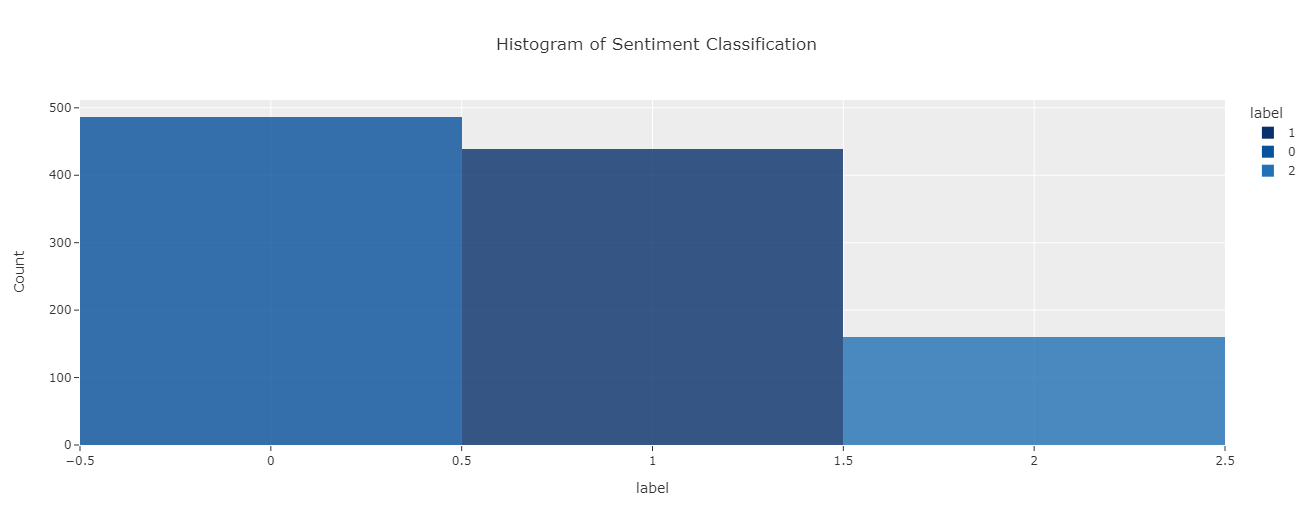

In [9]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

# count of ratings
fig = px.histogram(df,
             x = 'label',
             title = 'Histogram of Sentiment Classification',
             template = 'ggplot2',
             color = 'label',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [10]:
# encode label and mapping label name
#df["label"] = df["label"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [11]:
# clean text, lowercase and remove punk
df["text"] = df["text"].apply(lambda x: preprocess_tweet(x))

In [12]:
df.head()

text  label label_name
0    Oe Chacal      1    Neutral
1    Anda vete      0   Negative
2   a la firme      1    Neutral
3   Chau, cojo      0   Negative
4  Tengo plata      1    Neutral

In [13]:
df.sample(n = 30)

text  label label_name
405                Esto me está rayando, cuñado dijo      0   Negative
6                                           tas huevón      0   Negative
809    El Chipro lo sintió, después Chauca y el Iño      1    Neutral
27                                        es un chibolo      1    Neutral
436               Tremendo manganzón y yendo al estadio      0   Negative
638      Joaquincillo, ¿qué andas haciendo? Tranquilo      1    Neutral
624      Ahora, olvídese del asunto y déjelo a mi cargo      1    Neutral
874   Esos hombres debían ser caporales indios o cholos      1    Neutral
184                              El matón es su cachero      0   Negative
691     Pidió una jarra de chicha y la bebieron parados      1    Neutral
390                  Mil soles al que gane la mechadera      1    Neutral
50                                       Vamos a cantar      1    Neutral
288                        Yo seré viejo pero no cojudo      0   Negative
606      Me arrechas con tu uniforme de maletero dijo      1    Neutral
517         MISTERIO:  No te vas a morir, conchatumadre      0   Negative
583         Yo me hago el loco, quiero decir el pendejo      1    Neutral
69                                      Disfruta huevón      2   Positive
868   Ya no eras como ellos, Zavalita, ya eras un cholo      1    Neutral
1084  Piensa: debe ser rico llegar a tu casa y que t...      2   Positive
196                              -Te ha dejado plantado      0   Negative
715     Las bestias, y hambrientas, eran los montoneros      0   Negative
423               no me acuerdo bien cuánta plata le di      1    Neutral
1078  Había allí un hombre bajo y delgado, pero de c...      1    Neutral
329                      No la estoy engañando, huevón      0   Negative
718     Pensé que a lo mejor seguías empinchado conmigo      1    Neutral
941   No creía en la Polla, pero voy a empezar a jug...      0   Negative
958   Yo si tuviera plata me iría del Perú mañana m...      1    Neutral
801    Que te peleaste con el viejo y te mandaste mudar      1    Neutral
54                                       -Cierto, taita      1    Neutral
164                               Estamos con la bajada      0   Negative

In [14]:
#Visualizations

In [15]:
#Word Cloud

In [17]:
from wordcloud import WordCloud


In [18]:

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [19]:

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords = set(stopwords.words('spanish', 'english'))
stopwords.update([ "chingo", "xq","aaay","Jajajaa","perra","kieren","verga","inés"])
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JairL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


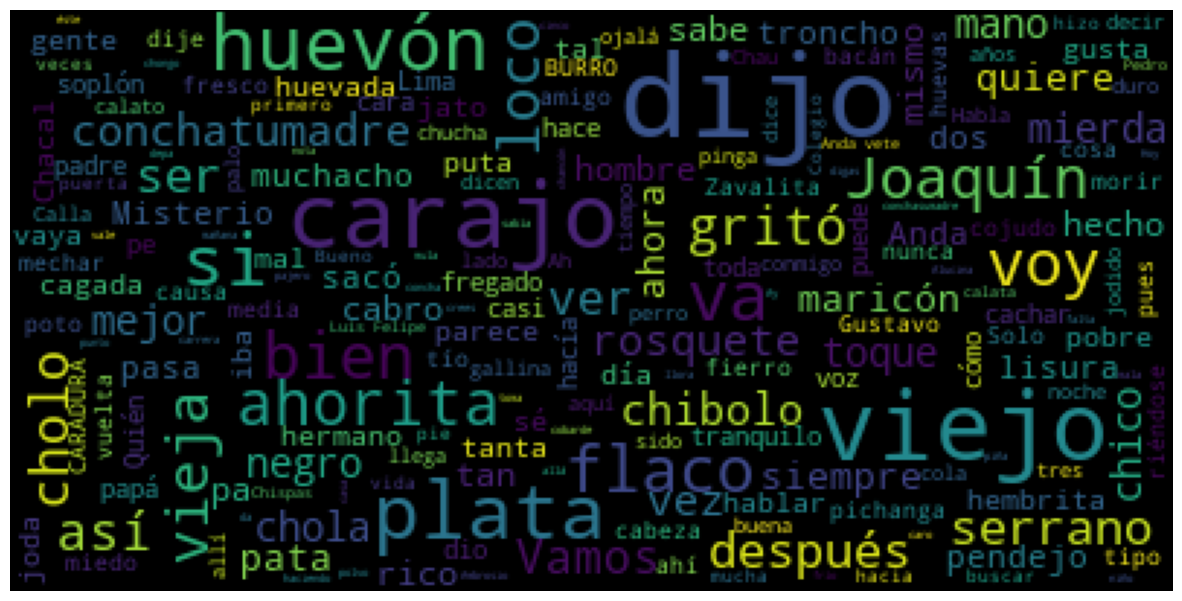

In [20]:
show_wordcloud(df["text"].values)

In [ ]:
#Target Count

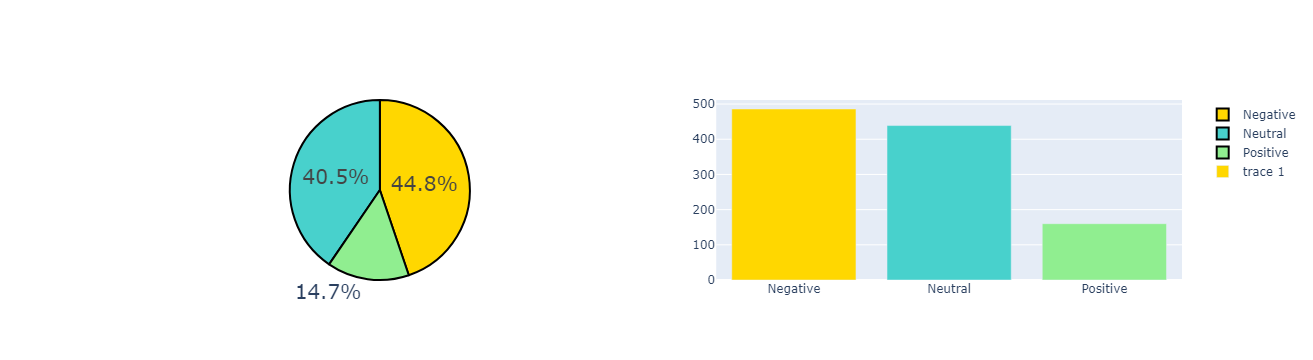

In [21]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [ ]:
#Token Counts with simple tokenizer¶


In [22]:
# tokenize data
#df["tokenized_text"] = df.text.apply(lambda x: tokenize(x))
df["tokenized_text"] = df.text.apply(lambda x: preprocess_tweet(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_text"].apply(lambda x: len(x.split()))

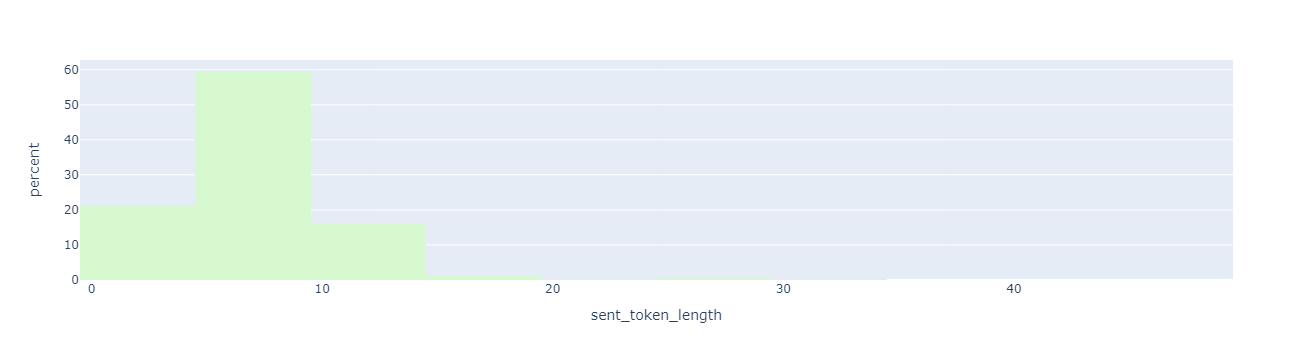

In [23]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [24]:
(df.sent_token_length < 20).mean()

0.9852534562211982

In [ ]:
#Token Counts with roBERTuito tokenizer

In [25]:
from transformers import AutoTokenizer
model_name = "pysentimiento/robertuito-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/323 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/858k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [26]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["text"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

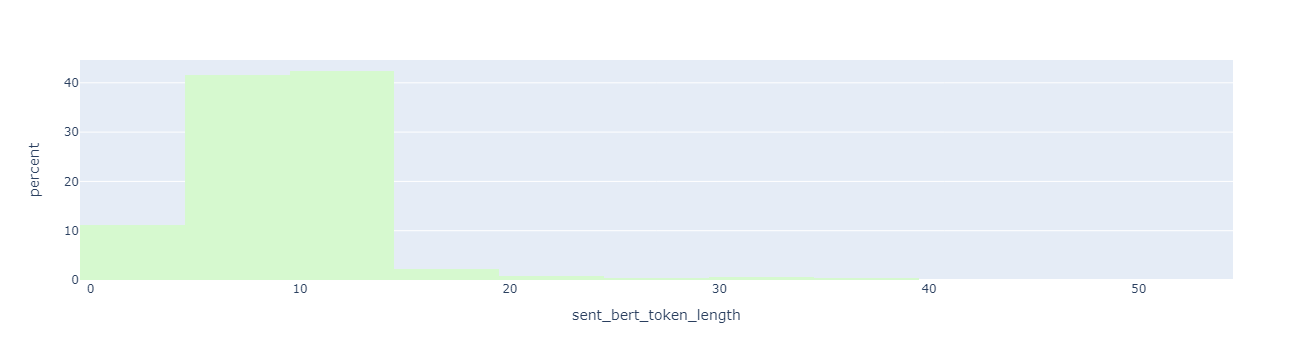

In [27]:
fig = px.histogram(df, x="sent_bert_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [28]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 20).mean()

0.9751152073732718

In [ ]:
#Characters Count in the Data

In [30]:

# valvulate char count for each review
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

import seaborn as sns
def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



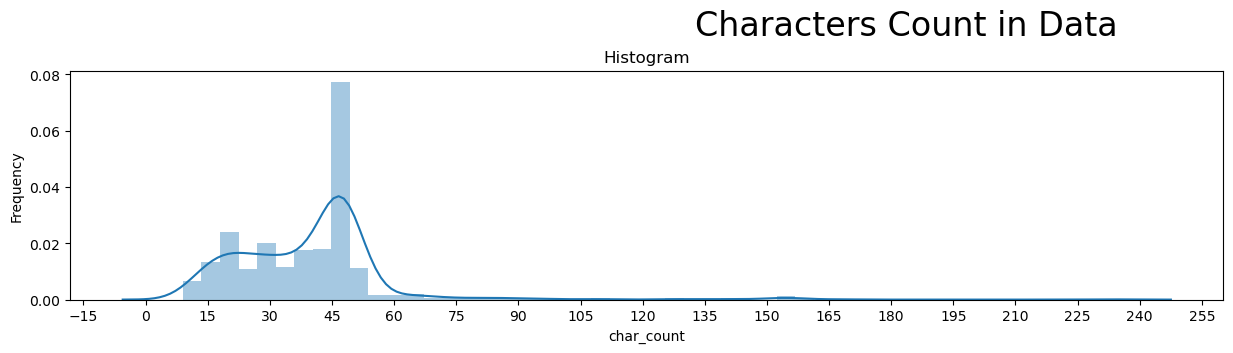

In [31]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

In [ ]:
#Reviews Lengths

In [32]:
# Creating a new feature for the visualization.
df['Character Count'] = df['text'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



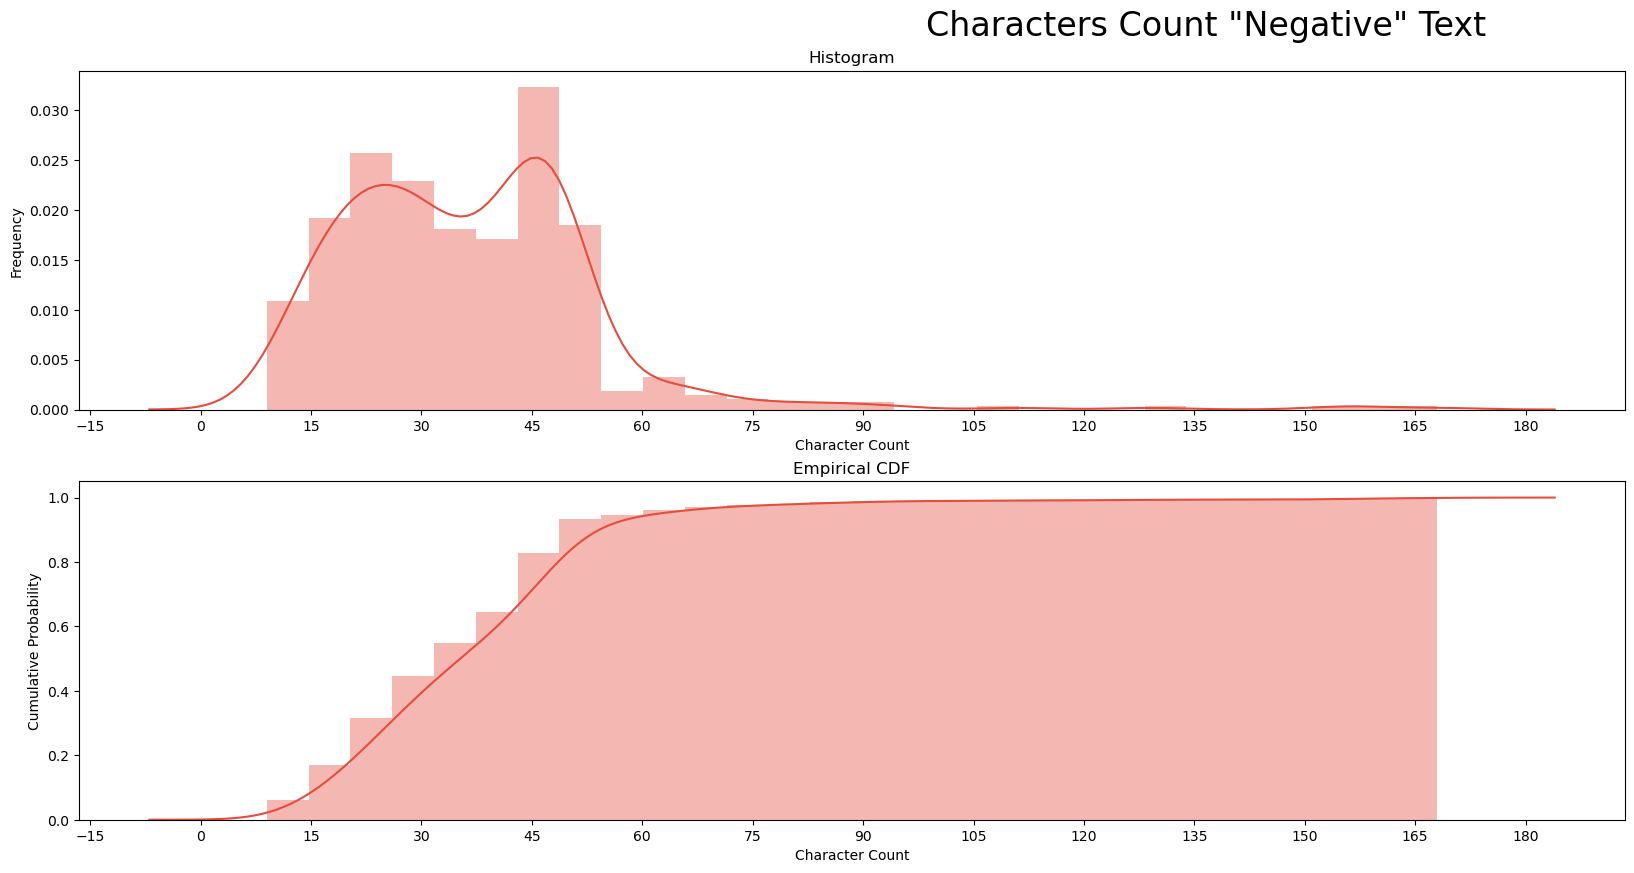

In [33]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Text')

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



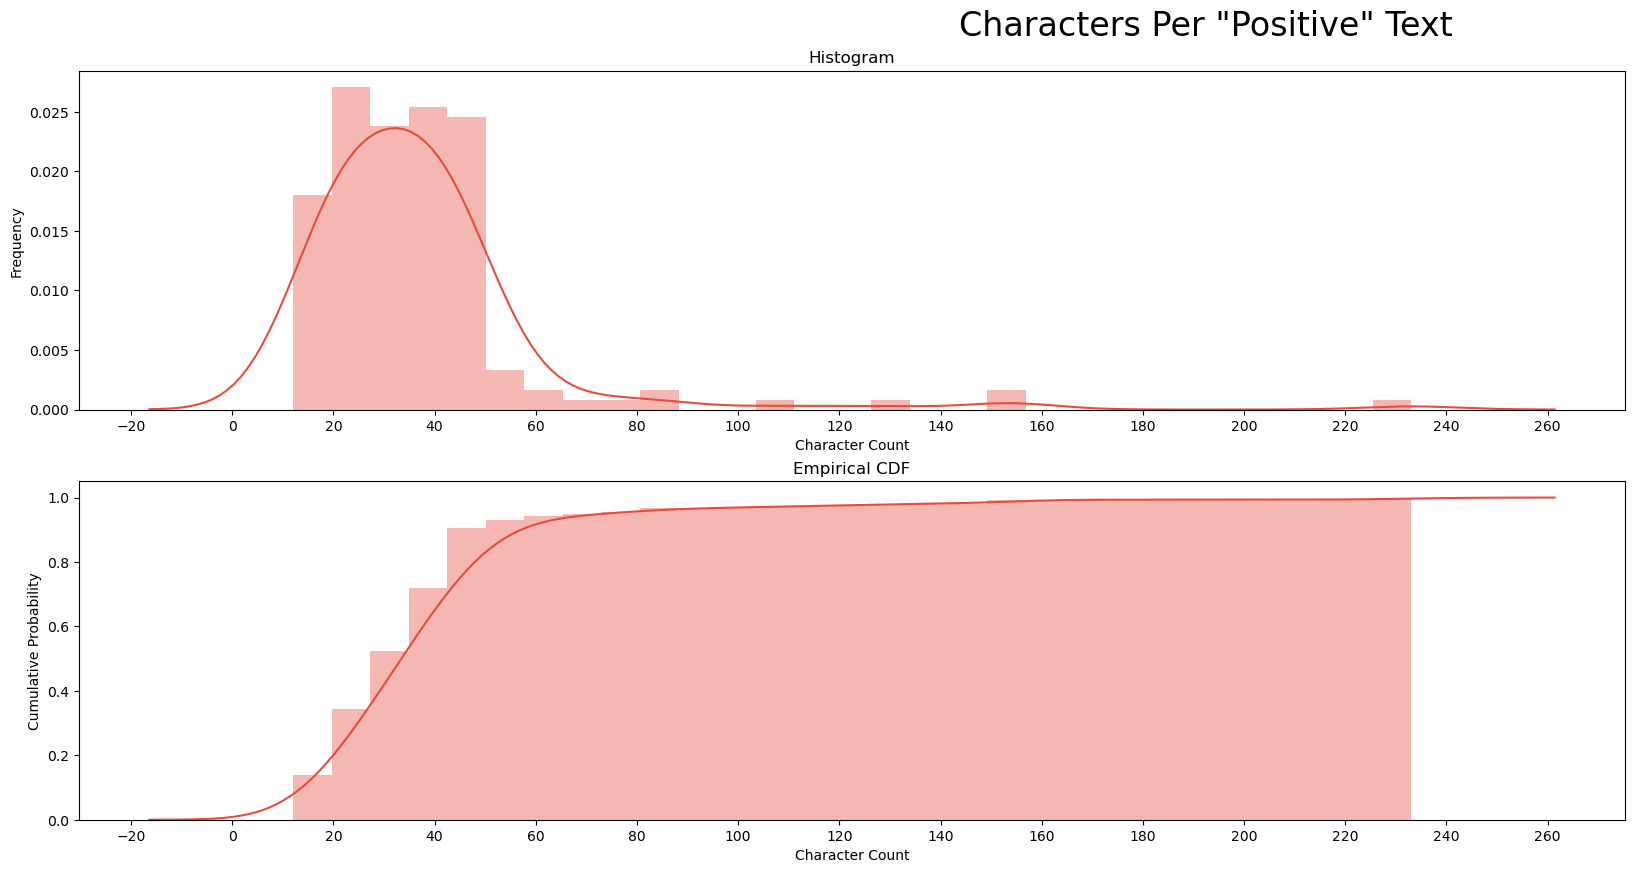

In [34]:
plot_dist3(df[df['label'] == 2], 'Character Count',
           'Characters Per "Positive" Text')

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



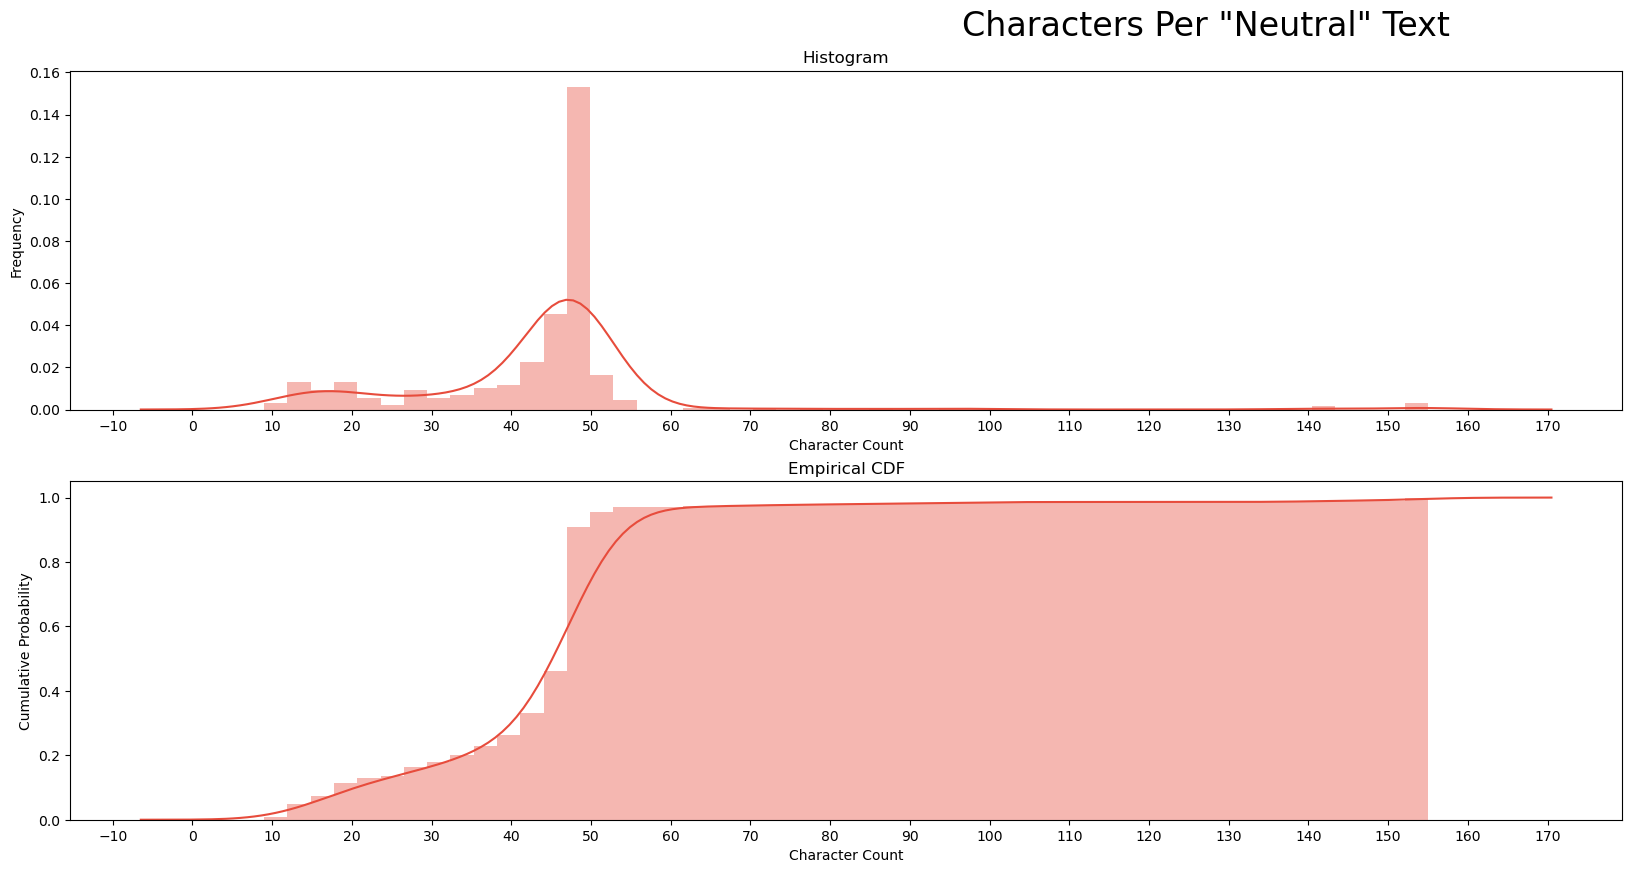

In [35]:
plot_dist3(df[df['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Text')

In [ ]:
#Word Counts

In [36]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('pozitive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\JairL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



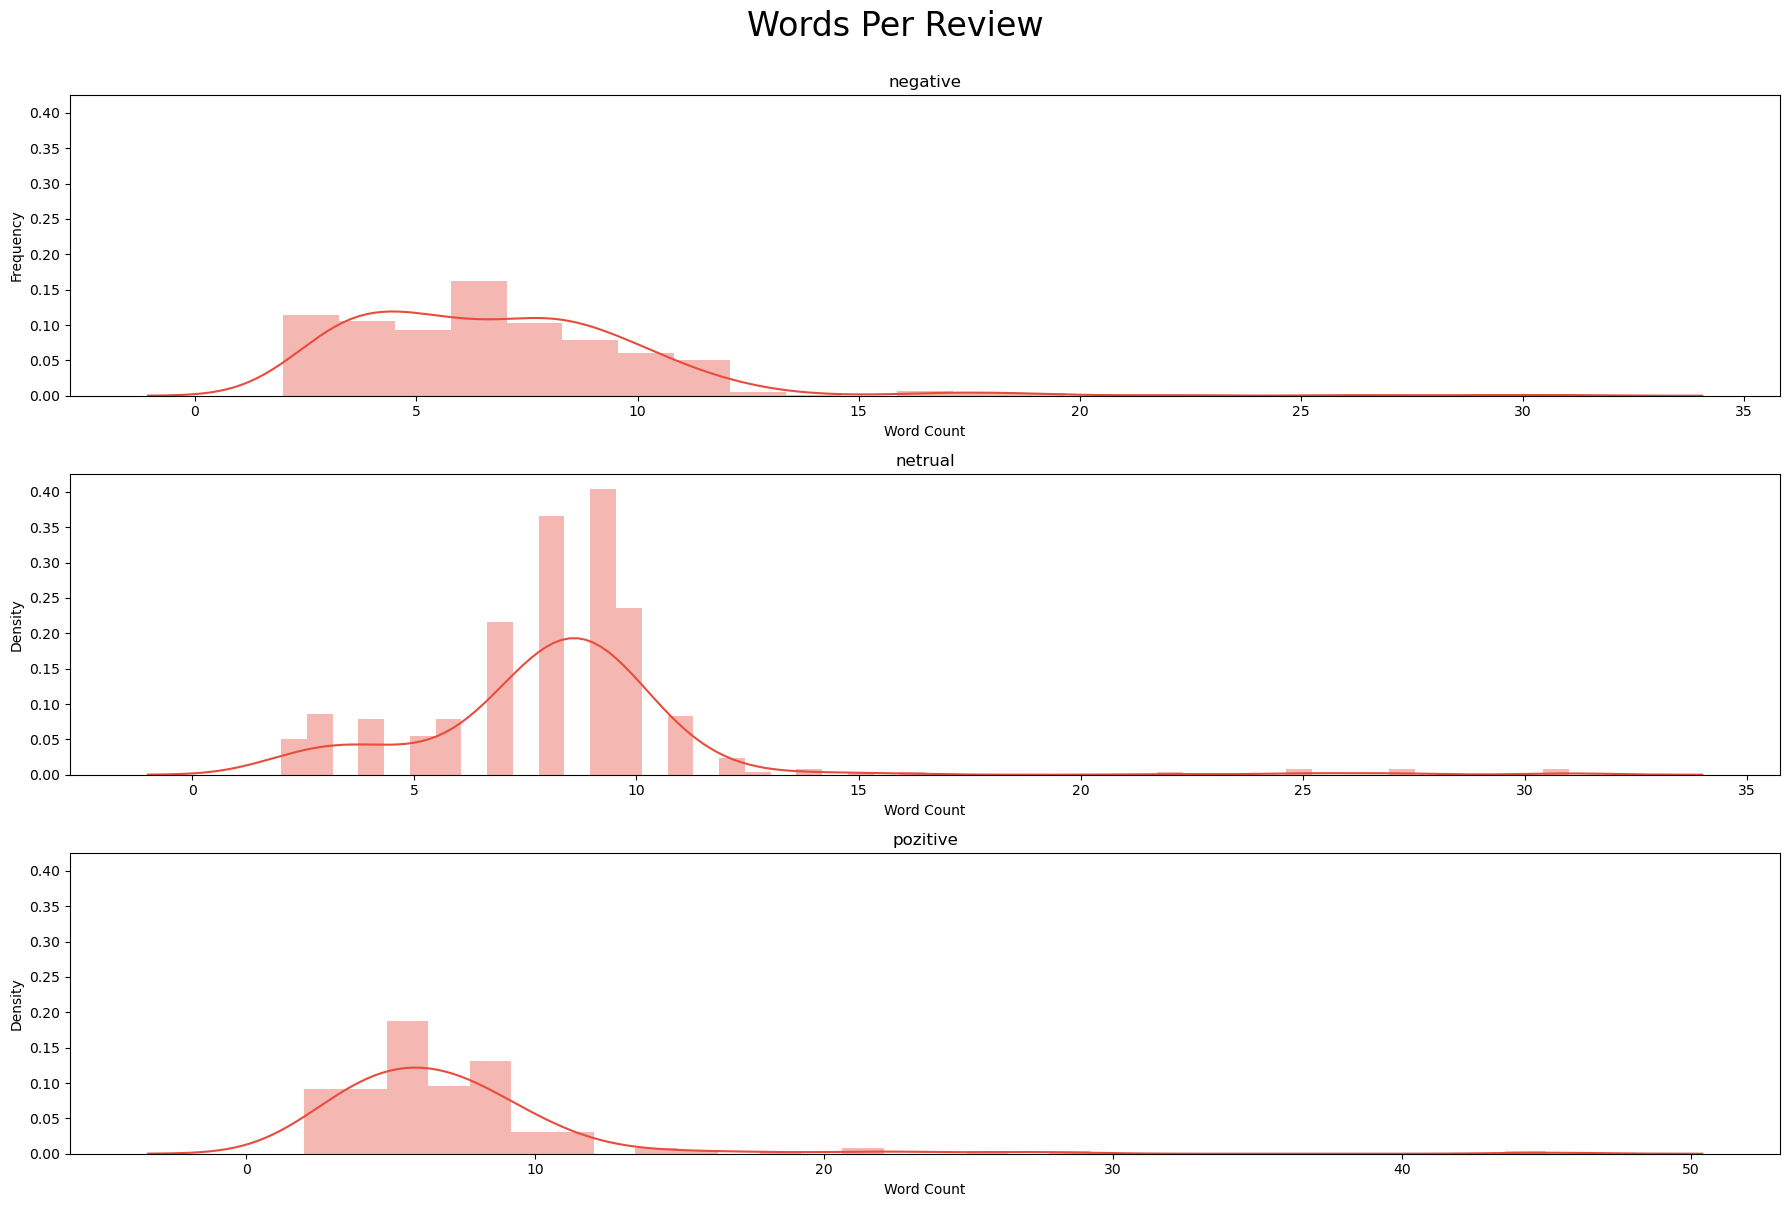

In [37]:
plot_word_number_histogram(df[df['label'] == 0]['text'],
                           df[df['label'] == 1]['text'],
                           df[df['label'] == 2]['text'],
                          )

In [ ]:
# remove punk 
#df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_punct(x))

In [38]:
df['tokenized_text'][:50]

0          Oe Chacal
1          Anda vete
2         a la firme
3         Chau, cojo
4        Tengo plata
5        Así no vale
6        tas huevón
7        Tanta finta
8       no jodas pe
9       estaba aguja
10      es la cagada
11      bien chévere
12     No seas cabro
13     ahorita acabo
14     Ahorita vengo
15     Estoy a punto
16     Ahorita salgo
17     Ahorita vengo
18     ahorita llega
19     Estás fregado
20     Parecías loco
21     tanta huevada
22     -Eres un vivo
23     Dale U carajo
24     eres mi causa
25     tanta huevada
26     Fui un huevón
27     es un chibolo
28     Es un maricón
29     Te ha fregado
30     Enano cabrón
31     tanta huevada
32    Vengan ahorita
33    Vuelvo ahorita
34    Ya la quemaron
35    habla Misterio
36    Mi viejo lloró
37    Vamos al toque
38    Anda a tu casa
39    Anda vete, sal
40    Vamos al toque
41    Sigue mechando
42    Desde chiquita
43    estoy voladazo
44    El pobre negro
45    No tengo plata
46    Era un chancón
47    No tení

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JairL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


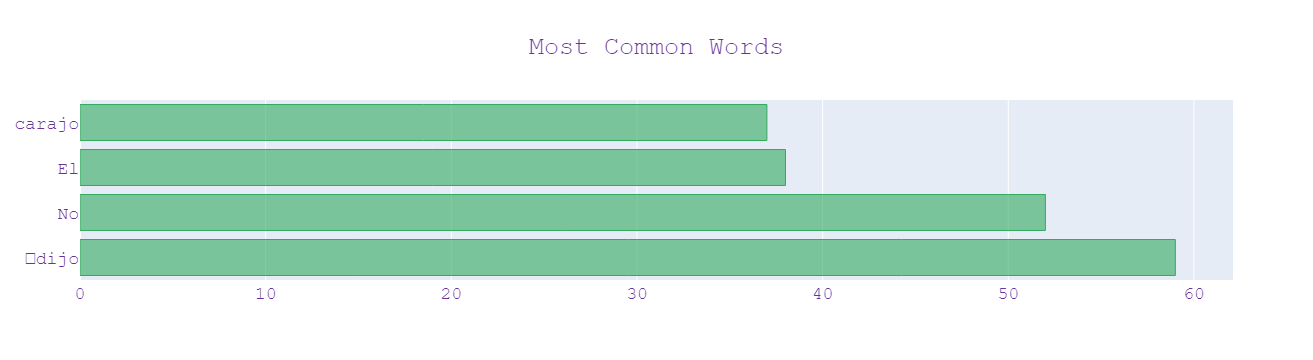

In [39]:
from collections import Counter, defaultdict

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('spanish'))

texts = df['tokenized_text']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

In [ ]:
#Most Common ngrams

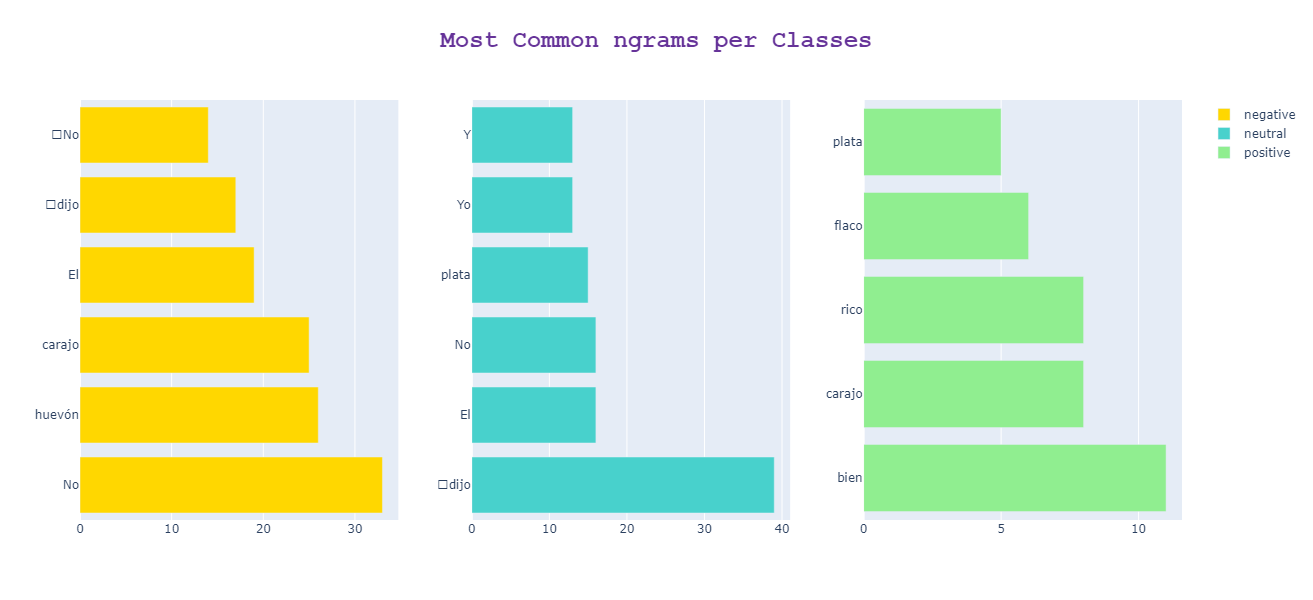

In [40]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

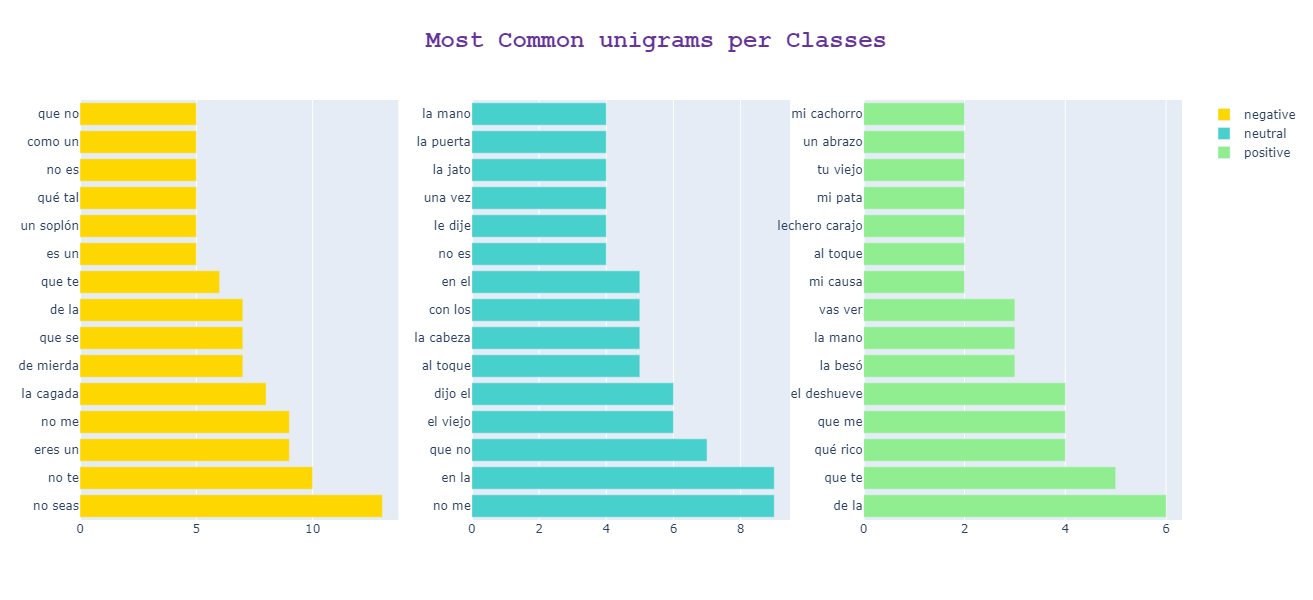

In [42]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

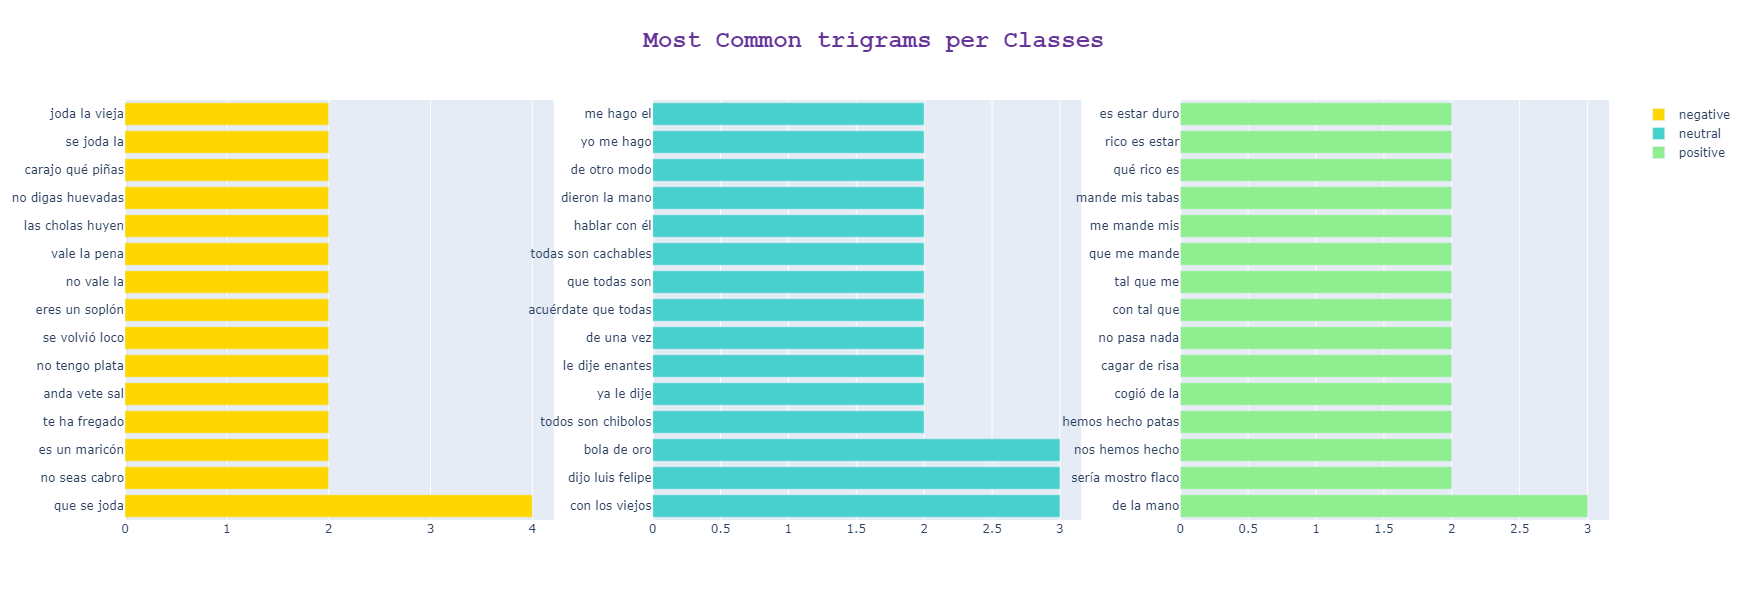

In [43]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_text']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [44]:
#split train test
from sklearn.model_selection import train_test_split


random_state=1
train_df_, val_df = train_test_split(df, 
                                    test_size=0.10, 
                                    random_state=random_state, 
                            stratify=df.label.values)

In [45]:

train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.10, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [46]:
train_df.to_csv('data/train.csv', index=False)
val_df.to_csv('data/val.csv', index=False)
test_df.to_csv('data/test.csv', index=False)

In [47]:
!ls -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [48]:
len(train_df)

878

In [49]:
len(test_df)

98

In [50]:


len(val_df)

109

In [51]:
df.sample(n = 30)

text  label label_name  \
62                                      Lo puse al palo      1    Neutral   
13                                        ahorita acabo      1    Neutral   
378                   El clima estaba fresco, agradable      2   Positive   
344                     Mierda, qué huevón eres dijo      0   Negative   
777    No es la primera vez que me acuesto con un chico      1    Neutral   
873   No, hijito, porque las moscas las creó el diablo      1    Neutral   
772    Sus palabras y el tono que empleaba eran fogosos      1    Neutral   
247                           Es un soplón y un cobarde      0   Negative   
159                               A diez minutos a pata      1    Neutral   
356                    Y el que nace cholo, muere cholo      1    Neutral   
844    Yo soy un viejo inútil pa la lucha con el cuerpo      0   Negative   
1077  Estabas en piyama, no encontrabas el calzoncil...      1    Neutral   
803    Alguien puso en las manos de Doroteo un cuchillo      0   Negative   
1009  ¿Qué te pasa, chibolo? ¿Por qué estás tan muñ...      1    Neutral   
782    ¿Y tú tienes hembrita? Sí, estoy medio amarrado      1    Neutral   
486          Andate y mete un poco de leña a la candela      1    Neutral   
489          El tipo hacía muecas y no paraba de hablar      0   Negative   
441              Hubiera preferido un mongolito, carajo      0   Negative   
443              A veces pienso que sigo templado de él      1    Neutral   
209                              Qué tal concha, carajo      0   Negative   
939   Yo creía que mi viejo te despidió dice Santiago      1    Neutral   
934   Ahí estaba, Zavalita: bajita, culoncita, morenita      0   Negative   
551        Fue con un pata del gimnasio dijo Gonzalo      1    Neutral   
879   Te saldría un cachorrito blanco y con ojos azules      1    Neutral   
223                             A mí déjenme en mi depa      1    Neutral   
513         cualquier huevada pasas la voz y la picamos      0   Negative   
983   Si quieres ver cabros, mejor vamos a la Javier...      1    Neutral   
347                     Yo estaba chupando en la cocina      1    Neutral   
1036  ¿A qué hora llega ese Misterio? Me llega al pi...      0   Negative   
276                        Haré que lo retiren, Serrano      0   Negative   

                                         tokenized_text  sent_token_length  \
62                                      Lo puse al palo                  4   
13                                        ahorita acabo                  2   
378                   El clima estaba fresco, agradable                  5   
344                     Mierda, qué huevón eres dijo                  5   
777    No es la primera vez que me acuesto con un chico                 11   
873   No, hijito, porque las moscas las creó el diablo                  9   
772    Sus palabras y el tono que empleaba eran fogosos                  9   
247                           Es un soplón y un cobarde                  6   
159                               A diez minutos a pata                  5   
356                    Y el que nace cholo, muere cholo                  7   
844    Yo soy un viejo inútil pa la lucha con el cuerpo                 11   
1077  Estabas en piyama, no encontrabas el calzoncil...                 27   
803    Alguien puso en las manos de Doroteo un cuchillo                  9   
1009  ¿Qué te pasa, chibolo? ¿Por qué estás tan muñ...                  9   
782    ¿Y tú tienes hembrita? Sí, estoy medio amarrado                  8   
486          Andate y mete un poco de leña a la candela                 10   
489          El tipo hacía muecas y no paraba de hablar                  9   
441              Hubiera preferido un mongolito, carajo                  5   
443              A veces pienso que sigo templado de él                  8   
209                              Qué tal concha, carajo                  4   
939   Yo creía que mi vi